In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings # Supress warnings 
# warnings.filterwarnings('ignore')

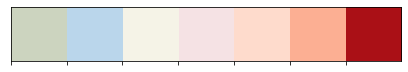

In [2]:
colors = ["#CCD4BF","#bad6eb","#F5F3E7", "#F5E2E4",'#fedbcc',"#fcaf93","#aa1016"]
sns.palplot(sns.color_palette(colors))

In [3]:
data_dic = pd.read_csv("DataDictionaryWiDS2021.csv")

labeled_data = pd.read_csv("TrainingWiDS2021.csv", index_col = 0)
unlabeled_data = pd.read_csv("UnlabeledWiDS2021.csv", index_col = 0)

In [4]:
pd.set_option('display.max_colwidth', None)

display(data_dic)

Category                Variable Name     Unit of Measure  \
0            identifier                 encounter_id                None   
1            identifier                  hospital_id                None   
2           demographic                          age               Years   
3           demographic                          bmi  kilograms/metres^2   
4           demographic             elective_surgery                None   
..                  ...                          ...                 ...   
176  APACHE comorbidity            immunosuppression                None   
177  APACHE comorbidity                     leukemia                None   
178  APACHE comorbidity                     lymphoma                None   
179  APACHE comorbidity  solid_tumor_with_metastasis                None   
180     Target Variable            diabetes_mellitus                None   

    Data Type  \
0     integer   
1     integer   
2     numeric   
3      string   
4      binary   
..        ...   
176    binary   
177    binary   
178    binary   
179    binary   
180    binary   

                                                                                                                                                                                                                                                                                                                 Description  \
0                                                                                                                                                                                                                                                                      Unique identifier associated with a patient unit stay   
1                                                                                                                                                                                                                                                                               Unique identifier associated with a hospital   
2                                                                                                                                                                                                                                                                                   The age of the patient on unit admission   
3                                                                                                                                                                                                                                                                        The body mass index of the person on unit admission   
4                                                                                                                                                                                                                                        Whether the patient was admitted to the hospital for an elective surgical operation   
..                                                                                                                                                                                                                                                                                                                       ...   
176  Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).   
177                                                                                                                                                                           Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.   
178              

In [5]:
data_dic.loc[data_dic['Variable Name'] == 'pre_icu_los_days']

Category     Variable Name Unit of Measure Data Type  \
14  demographic  pre_icu_los_days            Days   numeric   

                                                                        Description  \
14  The length of stay of the patient between hospital admission and unit admission   

   Example  
14     3.5

## IDs and label distribution

In [6]:
# DUPLICATES
labeled_data.duplicated().value_counts()

False    130157
dtype: int64

In [7]:
count_patients=len(labeled_data['encounter_id'].unique())

print(f'There are records from {count_patients} patients in the training set')


There are records from 130157 patients in the training set


In [8]:

count_patientstest=len(unlabeled_data['encounter_id'].unique())


print(f'There are records from {count_patientstest} patients in the training set')
      

There are records from 10234 patients in the training set


In [9]:
count_hospitals=len(labeled_data['hospital_id'].unique())

print(f'There are records from {count_hospitals} hospitals in the training set')


There are records from 204 hospitals in the training set


In [10]:
count_hospitalstest=len(unlabeled_data['hospital_id'].unique())

print(f'There are records from {count_hospitalstest} hospitals in the training set')


There are records from 190 hospitals in the training set


/Users/marianapc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


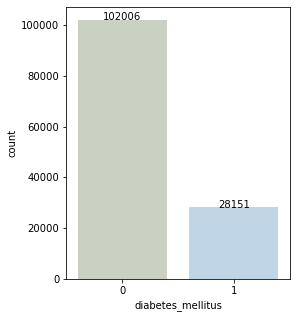

In [11]:
plt.figure(figsize=(4,5))
ax=sns.countplot(labeled_data['diabetes_mellitus'],palette=colors)
for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center")

In [12]:
labeled_data['encounter_id']

1         214826
2         246060
3         276985
4         262220
5         201746
           ...  
130153    164758
130154    197653
130155    219719
130156    222562
130157    157942
Name: encounter_id, Length: 130157, dtype: int64

# Missing values overall

In [13]:
(labeled_data.isnull().sum().sort_values(ascending=False)).to_frame().style.background_gradient(cmap='Blues')




## Demographics


In [14]:
demographics = data_dic.loc[data_dic.Category == "demographic"]
display(demographics)
dem = demographics["Variable Name"].to_list()

Category          Variable Name     Unit of Measure Data Type  \
2   demographic                    age               Years   numeric   
3   demographic                    bmi  kilograms/metres^2    string   
4   demographic       elective_surgery                None    binary   
5   demographic              ethnicity                None    string   
6   demographic                 gender                None    string   
7   demographic                 height         centimetres   numeric   
8   demographic  hospital_admit_source                None    string   
9   demographic       icu_admit_source                None    string   
10  demographic         icu_admit_type                None    string   
11  demographic                 icu_id                None   integer   
12  demographic          icu_stay_type                None    string   
13  demographic               icu_type                None    string   
14  demographic       pre_icu_los_days                Days   numeric   
15  demographic     readmission_status                None    binary   
16  demographic                 weight           kilograms   numeric   

                                                                                                Description  \
2                                                                  The age of the patient on unit admission   
3                                                       The body mass index of the person on unit admission   
4                       Whether the patient was admitted to the hospital for an elective surgical operation   
5                                     The common national or cultural tradition which the person belongs to   
6                                                                        The genotypical sex of the patient   
7                                                                The height of the person on unit admission   
8                                       The location of the patient prior to being admitted to the hospital   
9                                           The location of the patient prior to being admitted to the unit   
10                                                               The type of unit admission for the patient   
11                                       A unique identifier for the unit to which the patient was admitted   
12                                                                                                      NaN   
13                       A classification which indicates the type of care the unit is capable of providing   
14                          The length of stay of the patient between hospital admission and unit admission   
15  Whether the current unit stay is the second (or greater) stay at an ICU within the same hospitalization   
16                                                   The weight (body mass) of the person on unit admission   

             Example  
2               None  
3               21.5  
4                  0  
5          Caucasian  
6                  F  
7                180  
8               Home  
9     Operating room  
10    Cardiothoracic  
11              None  
12              None  
13  Neurological ICU  
14               3.5  
15                 0  
16                80

### Removing unnecessary columns

Some variables will be removed only from the demographics variables list, so that a better Explanatory Data Analysis can be performed, but others will be removed from the orginial datasets, as they are not relevant to further analysis

In [15]:
#train[dem]
#test[dem]

#icu_admit_type variable is neither on the train nor the test datasets, so it will be removed from the demographics
#variables list:
dem.remove("icu_admit_type")

#icu_id is not necessary for the explanatory analysis so it will be dropped from the demographics variables list:
dem.remove("icu_id")

for i in dem:
    if (len(labeled_data[i].unique()) == 1 or len(unlabeled_data[i].unique()) == 1):
        print(i, labeled_data[i].unique(), unlabeled_data[i].unique())

#readmission_status has only one unique value of 0 on both train and test datasets, so it will be dropped from
#the demographics variables list, as well as from both labeled and unlabeled data
dem.remove("readmission_status") 
labeled_data.drop("readmission_status", axis = 1, inplace = True)
unlabeled_data.drop("readmission_status", axis = 1, inplace = True)

readmission_status [0] [0]


### Demographics data description

In [16]:
demographics_labeled = labeled_data[dem]
demographics_unlabeled = unlabeled_data[dem]

In [17]:
demographics_labeled

age        bmi  elective_surgery         ethnicity gender  height  \
1       68.0  22.732803                 0         Caucasian      M   180.3   
2       77.0  27.421875                 0         Caucasian      F   160.0   
3       25.0  31.952749                 0         Caucasian      F   172.7   
4       81.0  22.635548                 1         Caucasian      F   165.1   
5       19.0        NaN                 0         Caucasian      M   188.0   
...      ...        ...               ...               ...    ...     ...   
130153  50.0  29.287256                 0         Caucasian      M   175.3   
130154  79.0  29.653433                 0         Caucasian      F   162.6   
130155  73.0  32.265371                 0  African American      M   177.8   
130156  81.0  24.408579                 0         Caucasian      M   185.4   
130157  35.0  30.132358                 0  African American      M   182.9   

       hospital_admit_source           icu_admit_source icu_stay_type  \
1                      Floor                      Floor         admit   
2                      Floor                      Floor         admit   
3       Emergency Department       Accident & Emergency         admit   
4             Operating Room  Operating Room / Recovery         admit   
5                        NaN       Accident & Emergency         admit   
...                      ...                        ...           ...   
130153  Emergency Department       Accident & Emergency         admit   
130154          Direct Admit       Accident & Emergency         admit   
130155  Emergency Department       Accident & Emergency         admit   
130156  Emergency Department       Accident & Emergency         admit   
130157  Emergency Department       Accident & Emergency         admit   

            icu_type  pre_icu_los_days  weight  
1              CTICU          0.541667    73.9  
2       Med-Surg ICU          0.927778    70.2  
3       Med-Surg ICU          0.000694    95.3  
4              CTICU          0.000694    61.7  
5       Med-Surg ICU          0.073611     NaN  
...              ...               ...     ...  
130153   Cardiac ICU          0.023611    90.0  
130154          MICU          0.009722    78.4  
130155   Cardiac ICU          0.143056   102.0  
130156  Med-Surg ICU          0.188194    83.9  
130157          MICU          0.075000   100.8  

[130157 rows x 12 columns]

In [18]:
demographics_labeled.describe()

age            bmi  elective_surgery         height  \
count  125169.000000  125667.000000     130157.000000  128080.000000   
mean       61.995103      29.110260          0.189840     169.607219   
std        16.822880       8.262776          0.392176      10.833085   
min         0.000000      14.844926          0.000000     137.200000   
25%        52.000000      23.598006          0.000000     162.500000   
50%        64.000000      27.564749          0.000000     170.100000   
75%        75.000000      32.803127          0.000000     177.800000   
max        89.000000      67.814990          1.000000     195.590000   

       pre_icu_los_days         weight  
count     130157.000000  126694.000000  
mean           0.839933      83.791104  
std            2.485337      24.963063  
min           -0.250000      38.600000  
25%            0.045833      66.500000  
50%            0.155556      80.000000  
75%            0.423611      96.800000  
max          175.627778     186.000000

### Correlation

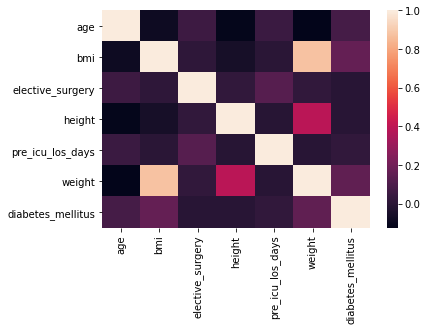

age       bmi  elective_surgery    height  \
age                1.000000 -0.083176          0.058116 -0.113424   
bmi               -0.083176  1.000000          0.011846 -0.056617   
elective_surgery   0.058116  0.011846          1.000000  0.019913   
height            -0.113424 -0.056617          0.019913  1.000000   
pre_icu_los_days   0.049000  0.000595          0.125292 -0.007673   
weight            -0.125448  0.878656          0.021910  0.390319   
diabetes_mellitus  0.081019  0.169043         -0.004910 -0.004302   

                   pre_icu_los_days    weight  diabetes_mellitus  
age                        0.049000 -0.125448           0.081019  
bmi                        0.000595  0.878656           0.169043  
elective_surgery           0.125292  0.021910          -0.004910  
height                    -0.007673  0.390319          -0.004302  
pre_icu_los_days           1.000000 -0.002421           0.022141  
weight                    -0.002421  1.000000           0.155517  
diabetes_mellitus          0.022141  0.155517           1.000000

In [19]:
correlationanalysis = demographics_labeled.join(labeled_data['diabetes_mellitus'])
sns.heatmap(correlationanalysis.corr())
plt.show()
display(correlationanalysis.corr())

### Explanatory Data Analysis

The Explanatory Data Analysis will be done only using the partition of the data corresponding to the demographics variables

**Age, Ethnicity and gender: Frequency distribution**

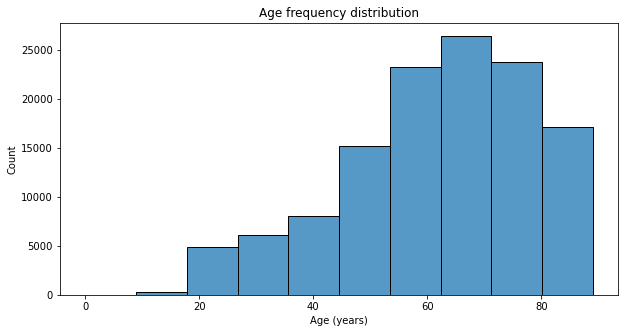

In [20]:
plt.figure(figsize = (10,5))
sns.histplot(demographics_labeled.age, bins = 10)
plt.xlabel("Age (years)")
plt.title("Age frequency distribution")
plt.show()

How does the number of cases of diabetes evolve with age?

/Users/marianapc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number of people Suffering')

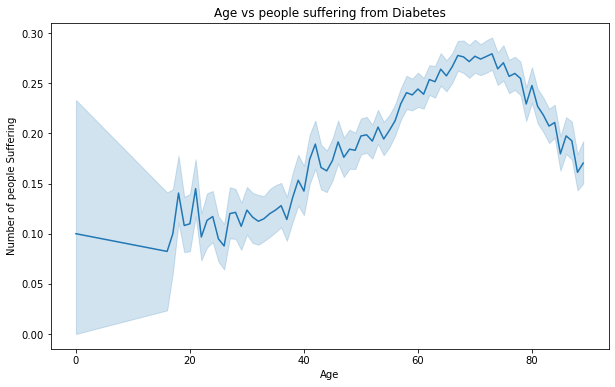

In [21]:
plt.figure(figsize=(10,6))
plt.title("Age vs people suffering from Diabetes")
sns.lineplot(labeled_data["age"],labeled_data["diabetes_mellitus"])
plt.xlabel("Age")
plt.ylabel("Number of people Suffering")

In [22]:
byage=labeled_data.groupby(['age']).sum()

In [23]:
byage.loc[byage['diabetes_mellitus']==byage['diabetes_mellitus'].max()]

encounter_id  hospital_id           bmi  elective_surgery     height  \
age                                                                          
67.0     688992680       338218  94390.750911               833  543518.91   

       icu_id  pre_icu_los_days    weight  albumin_apache  apache_2_diagnosis  \
age                                                                             
67.0  2135269       2884.228472  273444.2          3578.1            614921.0   

      ...  h1_pao2fio2ratio_max  h1_pao2fio2ratio_min  aids  cirrhosis  \
age   ...                                                                
67.0  ...           115115.7446         110175.280298     1         53   

      hepatic_failure  immunosuppression  leukemia  lymphoma  \
age                                                            
67.0               44                123        32         8   

      solid_tumor_with_metastasis  diabetes_mellitus  
age                                                   
67.0                          102                897  

[1 rows x 172 columns]

In [24]:
correlationanalysis[['age','diabetes_mellitus']].corr()

age  diabetes_mellitus
age                1.000000           0.081019
diabetes_mellitus  0.081019           1.000000

50% of the people testes are over 50% (as seen in the distribution table above).
The number of diabetes cases reches a peek for people that are around 67 years old. For older people, the number of cases decreases again. For this reason, the correlation between these 2 variables is not very prominent. 

We will create bins for age groups that seem to behave similarly:

[0:20[
[20:40
[40:50[
[50:60[
[60:70[
[70:80[
[80:[

In [25]:
def age_bin(age):
    
    if age <20: 
        return 0
    elif age < 40: 
        return 1
    elif age < 50: 
        return 2
    elif age < 60: 
        return 3
    elif age < 70:
        return 4
    elif age < 80:
        return 5
    else: 
        return 6
                                 

In [26]:
labeled_data['age_bin'] = labeled_data['age'].apply(age_bin)

<AxesSubplot:xlabel='age_bin', ylabel='diabetes_mellitus'>

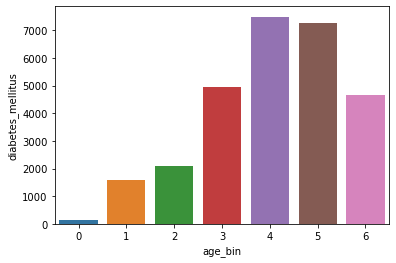

In [27]:
y= (labeled_data.groupby(['age_bin']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['age_bin'], y= y['diabetes_mellitus'])

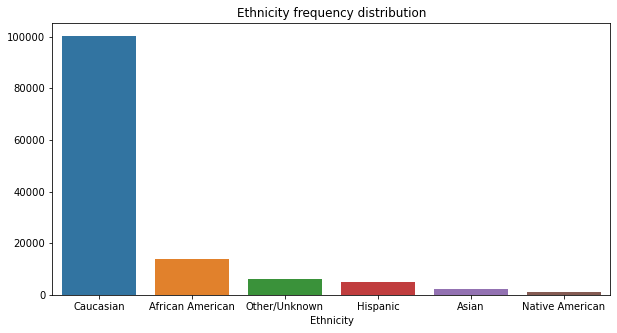

In [28]:
plt.figure(figsize = (10,5))
sns.barplot(x = demographics_labeled.ethnicity.value_counts().keys(), y = demographics_labeled.ethnicity.value_counts().values)
plt.xlabel("Ethnicity")
plt.title("Ethnicity frequency distribution")
plt.show()

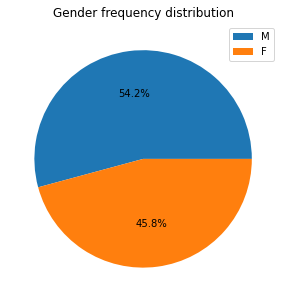

In [29]:
values = demographics_labeled.gender.value_counts().values
labels = demographics_labeled.gender.value_counts().keys()

plt.figure(figsize = (10,5))
plt.pie(x = values, autopct="%.1f%%")
plt.legend(labels)
plt.title("Gender frequency distribution")
plt.show()

<AxesSubplot:xlabel='gender'>

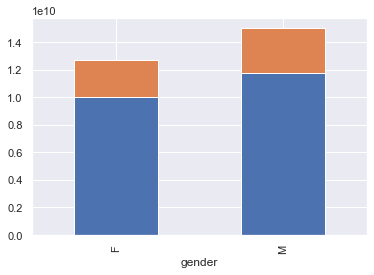

In [171]:
df1=labeled_data.groupby(['gender','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=False) #blue : no diabetes ; orange: diabetes

**Height, weight and bmi**

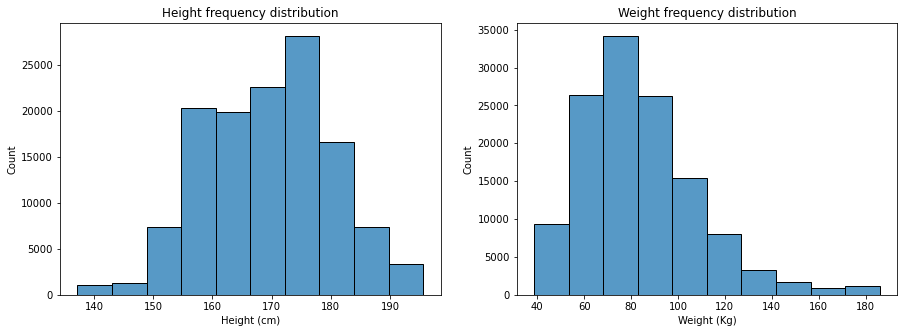

In [30]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sns.histplot(demographics_labeled.height, bins = 10, ax = axes[0])
axes[0].set_xlabel("Height (cm)")
axes[0].set_title("Height frequency distribution")
sns.histplot(demographics_labeled.weight, bins = 10, ax = axes[1])
axes[1].set_title("Weight frequency distribution")
axes[1].set_xlabel("Weight (Kg)")

plt.show()


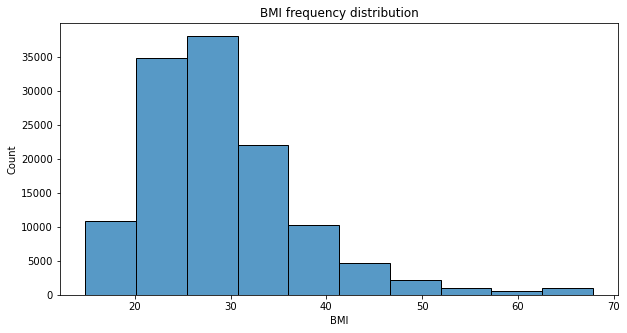

In [31]:
plt.figure(figsize = (10,5))
sns.histplot(demographics_labeled.bmi, bins = 10)
plt.xlabel("BMI")
plt.title("BMI frequency distribution")
plt.show()

In [32]:
correlationanalysis[['bmi','height','weight','diabetes_mellitus']].corr()

bmi    height    weight  diabetes_mellitus
bmi                1.000000 -0.056617  0.878656           0.169043
height            -0.056617  1.000000  0.390319          -0.004302
weight             0.878656  0.390319  1.000000           0.155517
diabetes_mellitus  0.169043 -0.004302  0.155517           1.000000

BMI formula : BMI = kg/m^2
Naturally, when weight increases, so does the BMI, which leads to high correlation between the variables. Therefore, we will focus our analysis on the BMI levels (which will translate into similar behaviour in the weight).

We will separate BMI values into 4 leves, tipically used in medicine.

- Below 18.5	: Underweight
- 18.5 – 24.9	: Normal or Healthy Weight
- 25.0 – 29.9	: Overweight
- 30.0 and Above	: Obese

In [33]:
def bmi_bin(bmi):
    
    if bmi < 18.5: 
        return "underweight"
    elif bmi < 25: 
        return "healthy"
    elif bmi < 30: 
        return "overweight"
    else: # Obese
        return "obese"

In [34]:
def bmi_encoder(bmi):
    
    if bmi < 18.5: 
        return -1
    elif bmi < 25: 
        return 0
    elif bmi < 30: 
        return 1
    else:
        return 2

In [35]:
labeled_data['bmi_class'] = labeled_data['bmi'].apply(bmi_bin)

labeled_data['bmi_class_encoder'] = labeled_data['bmi'].apply(bmi_encoder)

<AxesSubplot:xlabel='bmi_class', ylabel='diabetes_mellitus'>

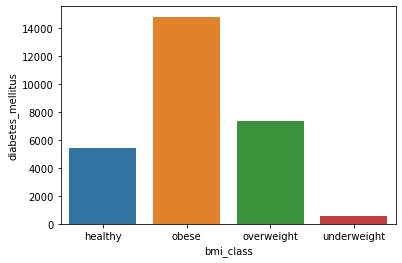

In [36]:
y= (labeled_data.groupby(['bmi_class']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['bmi_class'], y=y['diabetes_mellitus'])

In [37]:
def height_bin(bmi):
    
    if bmi < 150: 
        return 0
    elif bmi < 165: 
        return 1
    elif bmi < 180: 
        return 2
    else: # Obese
        return 3

In [38]:
labeled_data['height_bin'] = labeled_data['height'].apply(height_bin)

<AxesSubplot:xlabel='height_bin', ylabel='diabetes_mellitus'>

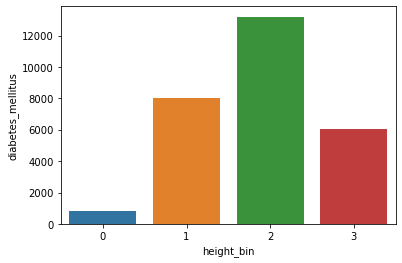

In [39]:
y= (labeled_data.groupby(['height_bin']).sum())['diabetes_mellitus'].reset_index()
sns.barplot(x=y['height_bin'], y=y['diabetes_mellitus'])

In [40]:
labeled_data[['height_bin','age_bin','diabetes_mellitus']].corr()

height_bin   age_bin  diabetes_mellitus
height_bin           1.000000 -0.126942          -0.009026
age_bin             -0.126942  1.000000           0.063762
diabetes_mellitus   -0.009026  0.063762           1.000000

Height does not have a relevant effect on diabetes number of detections, except for the fact that the number of diabetes on people under 150cm is much lower than on other levels. These will probably childen (which proves the point made above, that diabetes is more common among people in their sixties).

##### Combine BMI and age groups


In [41]:
labeled_data['profile'] = labeled_data["bmi_class_encoder"].astype(str) + labeled_data["age_bin"].astype(str)

#-1: underweight
#0: normal
#1: overweight
#2: obese

#0: <20
#1: 20<i<40
#2: 40<i<50
#3: 50<i<40
#4: 60<i<70
#5: 70<i<80
#6: 80<

In [42]:
profilescount = labeled_data['profile'].value_counts().to_frame()
#display(profilescount)

From the people in our dataset, the most common profile seems to be people between 60 / 70 years old, who are obese, followed by people slightly younger but also obese. Weight is a prominent characteristic in the patients.

People older than 80 years old are mainly in the normal BMI levels.

From the younger groups, the ones that are less represented in the dataset, most seem to be in the healthy weight level. There are more obese young people than underweight.


In [43]:
profilescount

profile
24     12900
23     10591
25     10576
06      9722
15      8504
14      8109
16      7446
05      7238
04      6735
13      6304
26      5837
22      5638
03      5489
21      5002
01      4304
11      3381
12      3183
02      2803
-16     1465
-15     1045
-14      983
-13      828
-11      599
00       573
-12      313
20       272
10       227
-10       90

In [44]:
profilescount= profilescount.rename(columns={'profile':'count'})

In [45]:
diabetesbyprofile=labeled_data.groupby(['profile']).sum()['diabetes_mellitus'].to_frame()

In [46]:
profiledf=profilescount.join(diabetesbyprofile)
profiledf['%_diabetes'] = round(profiledf['diabetes_mellitus']/profiledf['count']*100,2)

In [47]:
profiledf.sort_values(by='%_diabetes', ascending=False)

count  diabetes_mellitus  %_diabetes
25   10576               3710       35.08
24   12900               4478       34.71
23   10591               3027       28.58
26    5837               1658       28.41
15    8504               2146       25.24
-10     90                 22       24.44
22    5638               1286       22.81
14    8109               1793       22.11
16    7446               1515       20.35
05    7238               1281       17.70
13    6304               1097       17.40
04    6735               1101       16.35
12    3183                444       13.95
06    9722               1348       13.87
-11    599                 83       13.86
10     227                 31       13.66
03    5489                724       13.19
01    4304                542       12.59
21    5002                613       12.26
02    2803                340       12.13
-14    983                119       12.11
00     573                 69       12.04
-13    828                 93       11.23
-15   1045                116       11.10
11    3381                339       10.03
-12    313                 30        9.58
-16   1465                134        9.15
20     272                 12        4.41

Highest % of diabetes also in older / obese groups.

**Hospital and ICU admit source**

Hospital and ICU admit sources stand for the locations of the patients prior to being admitted to the hospital or the unit, respectively

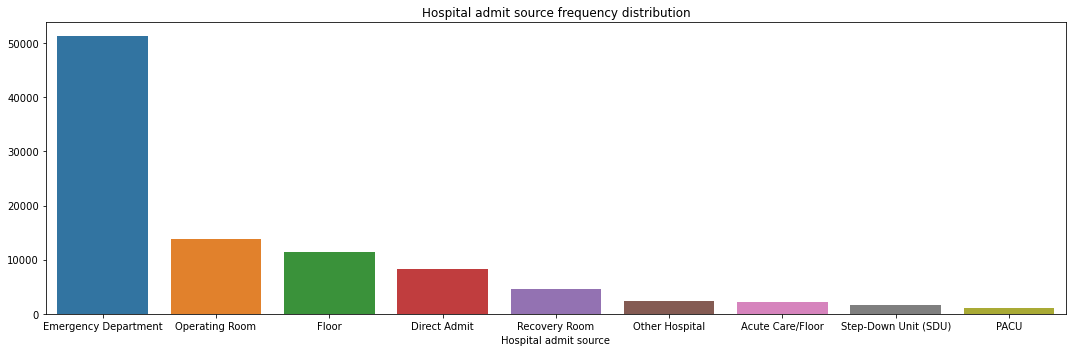

In [48]:
plt.figure(figsize = (15,5))

filtered = demographics_labeled.hospital_admit_source.value_counts()\
[demographics_labeled.hospital_admit_source.value_counts().values > 500]

sns.barplot(x = filtered.keys(),
            y = filtered.values)
plt.xlabel("Hospital admit source")
plt.title("Hospital admit source frequency distribution")

plt.tight_layout()
plt.show()

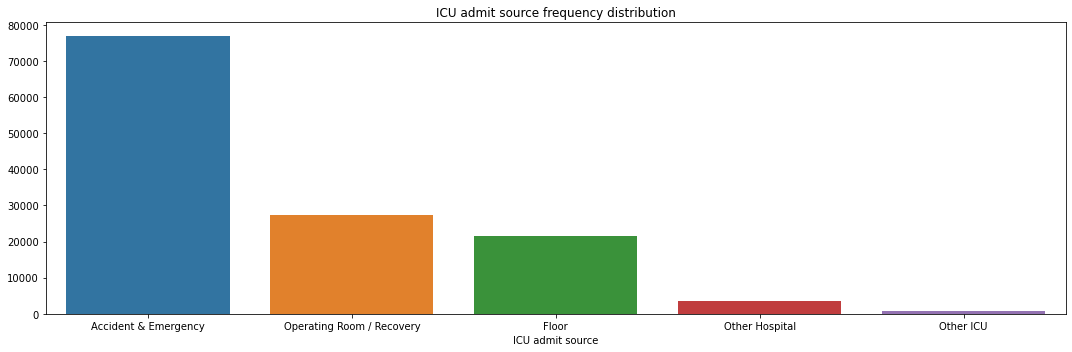

In [49]:
plt.figure(figsize = (15,5))

sns.barplot(x = demographics_labeled.icu_admit_source.value_counts().keys(),
            y = demographics_labeled.icu_admit_source.value_counts().values)
plt.xlabel("ICU admit source")
plt.title("ICU admit source frequency distribution")

plt.tight_layout()
plt.show()

**ICU type and stay type**

ICU type indicates the type of care the unit is capable of providing.

ICU stay type says whether the patient should be admitted, transferred or readmitted on the unit

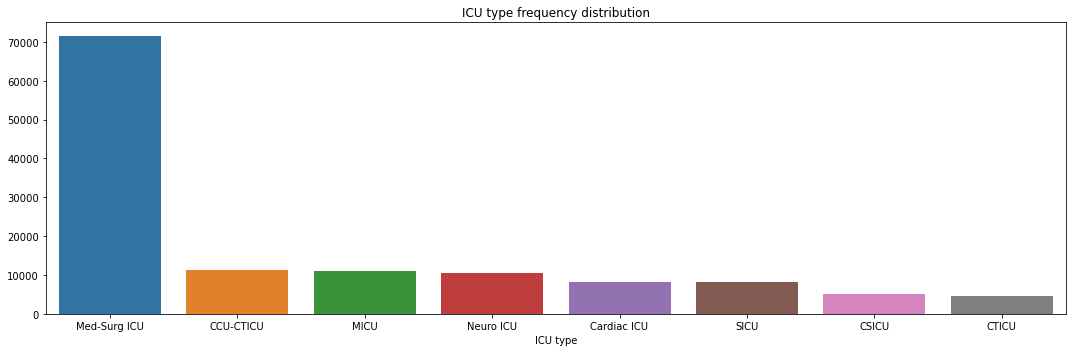

In [50]:
plt.figure(figsize = (15,5))

sns.barplot(x = demographics_labeled.icu_type.value_counts().keys(),
            y = demographics_labeled.icu_type.value_counts().values)
plt.xlabel("ICU type")
plt.title("ICU type frequency distribution")

plt.tight_layout()
plt.show()

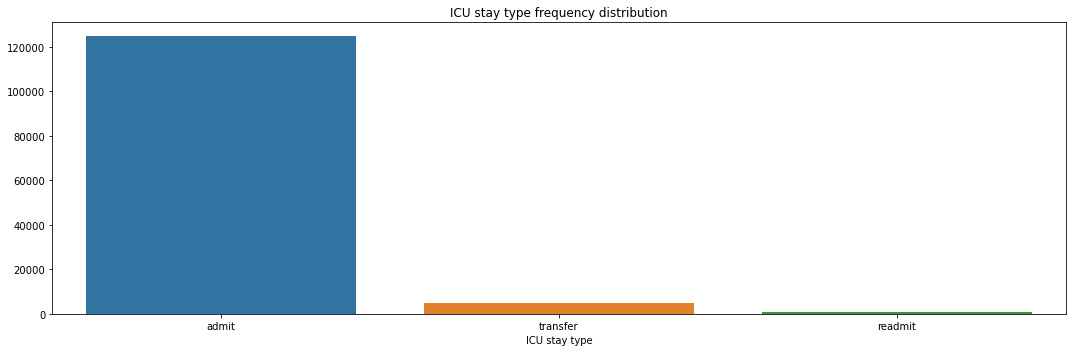

In [51]:
plt.figure(figsize = (15,5))

sns.barplot(x = demographics_labeled.icu_stay_type.value_counts().keys(),
            y = demographics_labeled.icu_stay_type.value_counts().values)
plt.xlabel("ICU stay type")
plt.title("ICU stay type frequency distribution")

plt.tight_layout()
plt.show()

**Pre ICU days**

Pre_icu_los_days represents the length of stay of the patient between hospital admission and unit admission

In [52]:
demographics_labeled.pre_icu_los_days.value_counts().sort_values(ascending = False).to_frame()

pre_icu_los_days
0.000000               5364
0.000694               1649
0.001389               1128
0.002083               1016
0.003472                927
...                     ...
10.627083                 1
7.803472                  1
3.809722                  1
8.667361                  1
21.430556                 1

[10912 rows x 1 columns]

In [53]:
labeled_data['pre_icu_los_hours'] = labeled_data['pre_icu_los_days']*24

In [54]:
labeled_data['pre_icu_los_hours'].describe()

count    130157.000000
mean         20.158396
std          59.648082
min          -6.000000
25%           1.100000
50%           3.733333
75%          10.166667
max        4215.066667
Name: pre_icu_los_hours, dtype: float64

In [55]:
def icu_wait(hours):
    if hours < 1:
        return 'under 1 hour'
    elif hours <3:
        return 'under 3 hours'
    elif hours<24:
        return 'under 1 day'
    else:
        return 'over 1 day'
        
def icu_wait_code(hours):
    if hours < 1:
        return -1
    elif hours <3:
        return 0
    elif hours<24:
        return 1
    else:
        return 2
    

In [56]:
labeled_data['pre_icu_bin'] = labeled_data['pre_icu_los_hours'].apply(icu_wait)

labeled_data['pre_icu_encoder']=labeled_data['pre_icu_los_hours'].apply(icu_wait_code)

In [57]:
labeled_data[['pre_icu_bin','pre_icu_encoder']]

pre_icu_bin  pre_icu_encoder
1         under 1 day                1
2         under 1 day                1
3        under 1 hour               -1
4        under 1 hour               -1
5       under 3 hours                0
...               ...              ...
130153   under 1 hour               -1
130154   under 1 hour               -1
130155    under 1 day                1
130156    under 1 day                1
130157  under 3 hours                0

[130157 rows x 2 columns]

In [58]:
labeled_data['pre_icu_bin'].value_counts()

under 1 day      51175
under 1 hour     30836
under 3 hours    26891
over 1 day       21255
Name: pre_icu_bin, dtype: int64

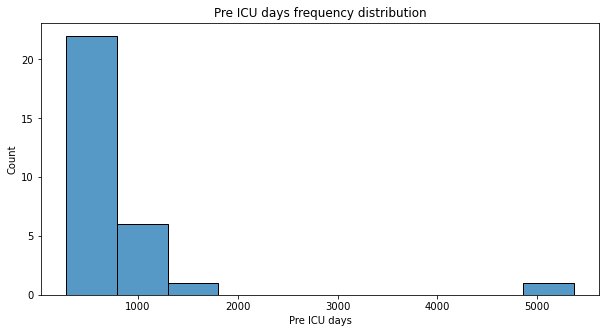

In [59]:
plt.figure(figsize = (10,5))
sns.histplot(demographics_labeled.pre_icu_los_days.value_counts().sort_values(ascending = False).head(30), bins = 10)
plt.xlabel("Pre ICU days")
plt.title("Pre ICU days frequency distribution")
plt.show()

In [60]:
counticubin=labeled_data.pre_icu_bin.value_counts().to_frame()

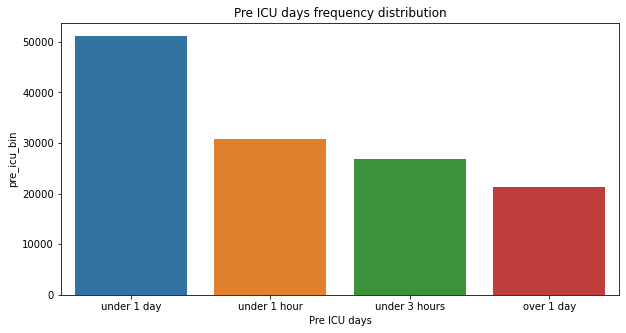

In [61]:
plt.figure(figsize = (10,5))
sns.barplot(x=counticubin.index, y= counticubin['pre_icu_bin'])
plt.xlabel("Pre ICU days")
plt.title("Pre ICU days frequency distribution")
plt.show()

In [62]:
dibetesicdays = labeled_data.groupby(['pre_icu_encoder']).sum()['diabetes_mellitus'].to_frame()

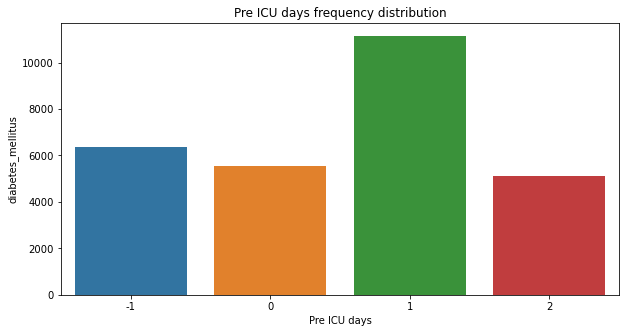

In [63]:
plt.figure(figsize = (10,5))
sns.barplot(x=dibetesicdays.index, y= dibetesicdays['diabetes_mellitus'])
plt.xlabel("Pre ICU days")
plt.title("Pre ICU days frequency distribution")
plt.show()

In [64]:
countencoder=labeled_data.pre_icu_encoder.value_counts().to_frame()

In [65]:
diabetesicu=dibetesicdays.join(countencoder)

In [66]:
diabetesicu['%_diabetes'] = diabetesicu['diabetes_mellitus']/diabetesicu['pre_icu_encoder']

In [67]:
diabetesicu

diabetes_mellitus  pre_icu_encoder  %_diabetes
pre_icu_encoder                                                
-1                            6374            30836    0.206706
 0                            5533            26891    0.205757
 1                           11148            51175    0.217841
 2                            5096            21255    0.239755

In [68]:
labeled_data[['pre_icu_encoder','diabetes_mellitus']].corr()

pre_icu_encoder  diabetes_mellitus
pre_icu_encoder           1.000000           0.024997
diabetes_mellitus         0.024997           1.000000

The number of days spent in the icu does not seem to be a relevant predictor for the detection of diabetes.

### Handling Missing Values

The missing values checking will be done using the partition of the data corresponding to the demographics variables

Then, the analysis on the missing values themselves, and the changes needed to handle those values, will be done on the original datasets (both training and test)

In [69]:
a = (demographics_labeled.isnull().sum() / len(demographics_labeled) * 100)
b = (demographics_unlabeled.isnull().sum() / len(demographics_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% unlabeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
hospital_admit_source                   25.506120   
bmi                                      3.449680   
weight                                   2.660633   
height                                   1.595765   
ethnicity                                1.219297   
icu_admit_source                         0.184393   
gender                                   0.050708   
age                                      3.832295   
elective_surgery                         0.000000   
icu_stay_type                            0.000000   
icu_type                                 0.000000   
pre_icu_los_days                         0.000000   

                       % unlabeled data null values  
hospital_admit_source                     26.705101  
bmi                                        9.917921  
weight                                     8.872386  
height                                     2.941176  
ethnicity                                  1.993355  
icu_admit_source                           0.244284  
gender                                     0.048857  
age                                        0.000000  
elective_surgery                           0.000000  
icu_stay_type                              0.000000  
icu_type                                   0.000000  
pre_icu_los_days                           0.000000

In [70]:
#hospital_admit_source, icu_admit_source, ethnicity, gender --> fill na with the most common value?
#age, bmi, weight, height --> fill na with the mean value?

#OR try to predict based on the other caracteristics??

### APACHE comorbidity

In [71]:
apache_com = data_dic.loc[data_dic.Category == "APACHE comorbidity"]
display(apache_com)
ap_com = apache_com["Variable Name"].to_list()

Category                Variable Name Unit of Measure  \
173  APACHE comorbidity                         aids            None   
174  APACHE comorbidity                    cirrhosis            None   
175  APACHE comorbidity              hepatic_failure            None   
176  APACHE comorbidity            immunosuppression            None   
177  APACHE comorbidity                     leukemia            None   
178  APACHE comorbidity                     lymphoma            None   
179  APACHE comorbidity  solid_tumor_with_metastasis            None   

    Data Type  \
173    binary   
174    binary   
175    binary   
176    binary   
177    binary   
178    binary   
179    binary   

                                                                                                                                                                                                                                                                                                                 Description  \
173                                                                                                                                                                                                    Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)   
174                                    Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.   
175                                                                                                                                                                       Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.   
176  Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).   
177                                                                                                                                                                           Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.   
178                                                                                                                                                                                                                                                        Whether the patient has been diagnosed with non-Hodgkin lymphoma.   
179                                                                                                                                                                                   Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.   

    Example  
173       1  
174       1  
175       1  
176       1  
177       1  
178       1  
179       1

### Removing unnecessary columns

In this case, it is not necessary to remove any column from the APACHE comorbidity variables set

### APACHE Comorbidity data description

In [72]:
apache_com_labeled = labeled_data[ap_com]
apache_com_unlabeled = unlabeled_data[ap_com]

In [255]:
apache_com_labeled

aids  cirrhosis  hepatic_failure  immunosuppression  leukemia  \
1          0          0                0                  0         0   
2          0          0                0                  0         0   
3          0          0                0                  0         0   
4          0          0                0                  0         0   
5          0          0                0                  0         0   
...      ...        ...              ...                ...       ...   
130153     0          0                0                  0         0   
130154     0          0                0                  0         0   
130155     0          0                0                  0         0   
130156     0          0                0                  0         0   
130157     0          0                0                  0         0   

        lymphoma  solid_tumor_with_metastasis  
1              0                            0  
2              0                            0  
3              0                            0  
4              0                            0  
5              0                            0  
...          ...                          ...  
130153         0                            0  
130154         0                            0  
130155         0                            0  
130156         0                            0  
130157         0                            0  

[130157 rows x 7 columns]

In [253]:
apache_com_labeled.cirrhosis.unique()

array([0, 1])

In [74]:
apache_com_labeled.describe()

aids      cirrhosis  hepatic_failure  immunosuppression  \
count  130157.00000  130157.000000    130157.000000      130157.000000   
mean        0.00103       0.016081         0.013599           0.025669   
std         0.03207       0.125786         0.115819           0.158146   
min         0.00000       0.000000         0.000000           0.000000   
25%         0.00000       0.000000         0.000000           0.000000   
50%         0.00000       0.000000         0.000000           0.000000   
75%         0.00000       0.000000         0.000000           0.000000   
max         1.00000       1.000000         1.000000           1.000000   

            leukemia       lymphoma  solid_tumor_with_metastasis  
count  130157.000000  130157.000000                130157.000000  
mean        0.007307       0.004187                     0.020852  
std         0.085166       0.064574                     0.142888  
min         0.000000       0.000000                     0.000000  
25%         0.000000       0.000000                     0.000000  
50%         0.000000       0.000000                     0.000000  
75%         0.000000       0.000000                     0.000000  
max         1.000000       1.000000                     1.000000

### Correlation

In [257]:
comordiabetes=apache_com_labeled.join(labeled_data['diabetes_mellitus'])

In [261]:
comordiabetes.corr()

aids  cirrhosis  hepatic_failure  \
aids                         1.000000   0.009228         0.002436   
cirrhosis                    0.009228   1.000000         0.537682   
hepatic_failure              0.002436   0.537682         1.000000   
immunosuppression            0.017513   0.000879         0.002754   
leukemia                    -0.002754  -0.003796         0.000052   
lymphoma                     0.012759  -0.000723        -0.000423   
solid_tumor_with_metastasis -0.001331  -0.002840         0.005150   
diabetes_mellitus           -0.010464   0.015179         0.009535   

                             immunosuppression  leukemia  lymphoma  \
aids                                  0.017513 -0.002754  0.012759   
cirrhosis                             0.000879 -0.003796 -0.000723   
hepatic_failure                       0.002754  0.000052 -0.000423   
immunosuppression                     1.000000  0.130967  0.100071   
leukemia                              0.130967  1.000000  0.029363   
lymphoma                              0.100071  0.029363  1.000000   
solid_tumor_with_metastasis           0.277214  0.008315  0.017183   
diabetes_mellitus                    -0.003022  0.003574 -0.000253   

                             solid_tumor_with_metastasis  diabetes_mellitus  
aids                                           -0.001331          -0.010464  
cirrhosis                                      -0.002840           0.015179  
hepatic_failure                                 0.005150           0.009535  
immunosuppression                               0.277214          -0.003022  
leukemia                                        0.008315           0.003574  
lymphoma                                        0.017183          -0.000253  
solid_tumor_with_metastasis                     1.000000          -0.013190  
diabetes_mellitus                              -0.013190           1.000000

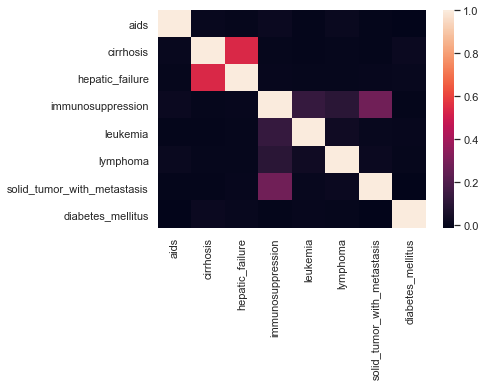

In [262]:
sns.heatmap(comordiabetes.corr())
plt.show()

A few of the diseases seem to be correlated, ie, a person who has ever had one will more likely had the other. This is the case of chirrosis and hepatic failure for example; as well as immunosuppresion and and solid tumors with metastasis.

However, there seems to be a very low correlation with the positive test for diabetes with the contraction of any of the other diseases. Further analysis below.

### Explanatory Data Analysis

The Explanatory Data Analysis will be done only using the partition of the data corresponding to the APACHE comorbidity variables

In [76]:
dic = {0: [], 1: []}

for i in ap_com:    
    for j in range(2):
        dic[j].append(apache_com_labeled[i].value_counts().values[j])

print("APACHE comorbidity variables frequency distribution:\n")
pd.DataFrame.from_dict(dic, orient = "index", columns = ap_com)

APACHE comorbidity variables frequency distribution:



aids  cirrhosis  hepatic_failure  immunosuppression  leukemia  lymphoma  \
0  130023     128064           128387             126816    129206    129612   
1     134       2093             1770               3341       951       545   

   solid_tumor_with_metastasis  
0                       127443  
1                         2714

0 means that the patient has not been diagnosed with the diseases

**Handling Missing Values**

In [77]:
a = (apache_com_labeled.isnull().sum() / len(apache_com_labeled) * 100)
b = (apache_com_unlabeled.isnull().sum() / len(apache_com_unlabeled) * 100)

dic = dict(zip(a.keys().to_list(),a.values))
i = 0
for k, v in dic.items():
    dic[k] = [dic[k]] + [b.values[i]]
    i += 1
    
null_values = pd.DataFrame.from_dict(dic, orient = "index",
                                     columns = ["% labeled data null values", "% unlabeled data null values"])\
                                     .sort_values("% unlabeled data null values", ascending = False)

display(null_values)

% labeled data null values  \
aids                                                0.0   
cirrhosis                                           0.0   
hepatic_failure                                     0.0   
immunosuppression                                   0.0   
leukemia                                            0.0   
lymphoma                                            0.0   
solid_tumor_with_metastasis                         0.0   

                             % unlabeled data null values  
aids                                                  0.0  
cirrhosis                                             0.0  
hepatic_failure                                       0.0  
immunosuppression                                     0.0  
leukemia                                              0.0  
lymphoma                                              0.0  
solid_tumor_with_metastasis                           0.0

There are no missing values on the APACHE comorbidity variables

#### Check relation between having at least one of the evaluators of the comorbidity score and diabetes

In [273]:
ap_com

['aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [284]:
labeled_data["total_chronic_present"] = labeled_data[ap_com].sum(axis=1)


In [285]:
labeled_data["total_chronic_present"] .unique()

array([0, 1, 2, 3, 4])

In [286]:
labeled_data["chronic_boolean"] = np.where(labeled_data["total_chronic_present"]>0,1,0)

In [287]:
labeled_data['chronic_boolean'].unique()

array([0, 1])

In [289]:
labeled_data[['chronic_boolean','diabetes_mellitus']].corr()

chronic_boolean  diabetes_mellitus
chronic_boolean           1.000000           0.002978
diabetes_mellitus         0.002978           1.000000

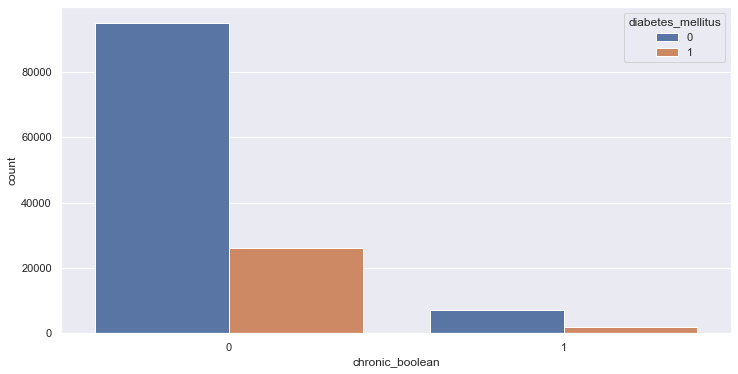

In [297]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="chronic_boolean", hue="diabetes_mellitus", data=labeled_data)

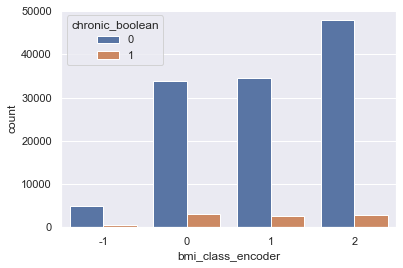

In [318]:
ax = sns.countplot(x="bmi_class_encoder", hue="chronic_boolean", data=labeled_data)

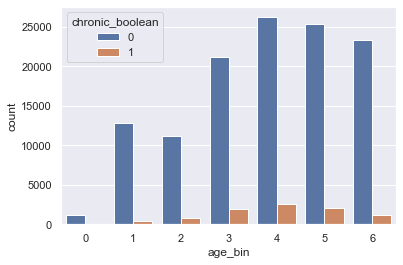

In [315]:
ax = sns.countplot(x="age_bin", hue="chronic_boolean", data=labeled_data)

In [78]:
#MARIANA

## Labs

In [94]:
labsdic = data_dic.loc[data_dic['Category']=='labs']
labsvars = labsdic['Variable Name'].to_list()
labsdf=labeled_data[labsvars]

In [80]:
labsdf

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
1                  2.3             2.3               0.4               0.4   
2                  1.6             1.6               0.5               0.5   
3                  NaN             NaN               NaN               NaN   
4                  NaN             NaN               NaN               NaN   
5                  NaN             NaN               NaN               NaN   
...                ...             ...               ...               ...   
130153             NaN             NaN               NaN               NaN   
130154             3.5             3.5               0.7               0.7   
130155             3.3             3.3               0.5               0.5   
130156             NaN             NaN               NaN               NaN   
130157             NaN             NaN               NaN               NaN   

        d1_bun_max  d1_bun_min  d1_calcium_max  d1_calcium_min  \
1             31.0        30.0             8.5             7.4   
2             11.0         9.0             8.6             8.0   
3              NaN         NaN             NaN             NaN   
4              NaN         NaN             NaN             NaN   
5              NaN         NaN             NaN             NaN   
...            ...         ...             ...             ...   
130153         NaN         NaN             NaN             NaN   
130154        32.0        32.0             9.0             9.0   
130155        31.0        30.0             8.1             8.0   
130156        45.0        45.0             6.4             6.4   
130157        13.0        13.0             9.5             9.5   

        d1_creatinine_max  d1_creatinine_min  ...  h1_lactate_max  \
1                    2.51               2.23  ...             NaN   
2                    0.71               0.56  ...             3.5   
3                     NaN                NaN  ...             NaN   
4                     NaN                NaN  ...             NaN   
5                     NaN                NaN  ...             NaN   
...                   ...                ...  ...             ...   
130153                NaN                NaN  ...             NaN   
130154               1.07               1.07  ...             NaN   
130155               2.65               2.41  ...             9.8   
130156               2.21               2.21  ...             1.3   
130157               1.06               1.06  ...             NaN   

        h1_lactate_min  h1_platelets_max  h1_platelets_min  h1_potassium_max  \
1                  NaN               NaN               NaN               NaN   
2                  3.5             557.0             557.0               4.2   
3                  NaN               NaN               NaN               NaN   
4                  NaN              43.0              43.0               NaN   
5                  NaN               NaN               NaN               NaN   
...                ...               ...               ...               ...   
130153             NaN               NaN               NaN               NaN   
130154             NaN               NaN               NaN               NaN   
130155             9.8             232.0             232.0               3.9   
130156             1.3               NaN               NaN               NaN   
130157             NaN               NaN               NaN               4.1   

        h1_potassium_min  h1_sodium_max  h1_sodium_min  h1_wbc_max  h1_wbc_min  
1                    NaN            NaN            NaN         NaN         NaN  
2                    4.2          145.0          145.0        12.7        12.7  
3                    NaN            NaN            NaN         NaN         NaN  
4                    NaN            NaN            NaN         8.8         8.8  
5                    NaN            NaN            NaN         NaN         NaN  
..

In [81]:
#different variables being tested

from collections import Counter

v=[]
for var in labsvars:
    v.append(var[3:-4])
print(len(Counter(v)))
Counter(v)
listvars=list(Counter(v).keys())
listvars

15


['albumin',
 'bilirubin',
 'bun',
 'calcium',
 'creatinine',
 'glucose',
 'hco3',
 'hemaglobin',
 'hematocrit',
 'inr',
 'lactate',
 'platelets',
 'potassium',
 'sodium',
 'wbc']

In [82]:
d = pd.DataFrame(labsdf.loc[:, labsdf.columns.str.startswith('d1')])
h = pd.DataFrame(labsdf.loc[:, labsdf.columns.str.startswith('h1')])


In [83]:
#sanity check to see if there are min values > max for d1 and h1
for f in listvars:
    d['min>max'] = np.where((d[f"d1_{f}_min"] > d[f"d1_{f}_max"]), 
         'PROBLEM', 
         'OK')
    
d['min>max'].value_counts()

OK    130157
Name: min>max, dtype: int64

In [84]:
for f in listvars:
    h['min>max'] = np.where((h[f"h1_{f}_min"] > h[f"h1_{f}_max"]), 
         'PROBLEM', 
         'OK')
h['min>max'].value_counts()

OK    130157
Name: min>max, dtype: int64

In [107]:
for f in listvars:
    max_d1 = 'd1_' + f + '_max'
    min_d1 = 'd1_' + f + '_min'
    
    d['d1_' + f + '_dif'] = d[max_d1] - d[min_d1]
    
d_dif=d.iloc[:,30:]

for f in listvars:
    max_h1 = 'h1_' + f + '_max'
    min_h1 = 'h1_' + f + '_min'
    
    h['h1_' + f + '_dif'] = h[max_h1] - h[min_h1]
    
h_dif=h.iloc[:,30:]

#a=d_dif.corr()
#sns.heatmap(a, cmap="Reds")


In [86]:
d["d_nancount"] = d.isna().sum(axis=1)
h["h_nancount"] = h.isna().sum(axis=1)
del d['min>max']
del h['min>max']
dh=d.join(h)

In [87]:
len(dh.loc[dh['d_nancount']!=dh['h_nancount']])/len(dh)

0.8214925052052521

In [88]:
minmax = dh.loc[:, ~((dh.columns.str.contains('dif')) |(dh.columns.str.contains('count')))]
mmdescribe= minmax.describe()

In [133]:
mmdescribe

d1_albumin_max  d1_albumin_min  d1_bilirubin_max  d1_bilirubin_min  \
count    58751.000000    58751.000000      53422.000000      53422.000000   
mean         2.952673        2.883073          1.191379          1.117405   
std          0.675606        0.679808          2.319165          2.201525   
min          1.200000        1.100000          0.200000          0.200000   
25%          2.500000        2.400000          0.400000          0.400000   
50%          3.000000        2.900000          0.700000          0.600000   
75%          3.400000        3.400000          1.100000          1.000000   
max          4.600000        4.500000         60.200000         58.000000   

          d1_bun_max     d1_bun_min  d1_calcium_max  d1_calcium_min  \
count  116423.000000  116423.000000   113465.000000   113465.000000   
mean       25.578808      23.554154        8.379782        8.164674   
std        20.495927      18.708332        0.740098        0.793055   
min         4.000000       3.000000        6.200000        5.500000   
25%        13.000000      12.000000        7.900000        7.700000   
50%        19.000000      17.000000        8.400000        8.200000   
75%        31.000000      29.000000        8.800000        8.700000   
max       126.000000     113.090000       10.800000       10.300000   

       d1_creatinine_max  d1_creatinine_min  ...  h1_lactate_max  \
count      116884.000000      116884.000000  ...    11690.000000   
mean            1.493531           1.363795  ...        3.028198   
std             1.525906           1.341642  ...        2.898524   
min             0.340000           0.300000  ...        0.400000   
25%             0.750000           0.710000  ...        1.300000   
50%             1.000000           0.940000  ...        2.000000   
75%             1.510000           1.400000  ...        3.600000   
max            11.110000           9.937900  ...       18.100000   

       h1_lactate_min  h1_platelets_max  h1_platelets_min  h1_potassium_max  \
count    11690.000000      24428.000000      24428.000000      29336.000000   
mean         2.976982        193.943057        193.123506          4.188984   
std          2.854953         92.486473         92.692759          0.760183   
min          0.400000         20.000000         20.000000          2.500000   
25%          1.250000        131.000000        130.000000          3.700000   
50%          2.000000        179.000000        179.000000          4.100000   
75%          3.500000        239.000000        238.000000          4.500000   
max         18.019500        585.000000        585.000000          7.200000   

       h1_potassium_min  h1_sodium_max  h1_sodium_min    h1_wbc_max  \
count      29336.000000   28376.000000   28376.000000  24171.000000   
mean           4.147028     138.167205     137.879814     13.387873   
std            0.749463       5.711628       5.658036      6.933161   
min            2.500000     114.000000     114.000000      1.100000   
25%            3.700000     136.000000     135.000000      8.600000   
50%            4.100000     139.000000     138.000000     12.100000   
75%            4.500000     141.000000     141.000000     16.700000   
max            7.100000     157.000000     157.000000     44.102000   

         h1_wbc_min  
count  24171.000000  
mean      13.336485  
std        6.915142  
min        1.089800  
25%        8.500000  
50%       12.100000  
75%       16.600000  
max       44.102000  

[8 rows x 60 columns]

<AxesSubplot:>

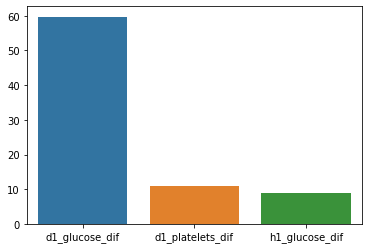

In [108]:
dif=pd.DataFrame(dh.loc[:, dh.columns.str.endswith(('dif'))])
df2 = dif[dif.columns[dif.mean(axis=0) > 5]]
df2mean=df2.mean()

sns.barplot(x = df2mean.index , y = df2mean)

## Vitals

In [95]:
vitalsdic = data_dic.loc[data_dic['Category']=='vitals']
vitalsvars = vitalsdic['Variable Name'].to_list()
vitalsdf=labeled_data[vitalsvars]

In [102]:
#vitalsdic

In [96]:
vitalsdf

d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
1                         46.0                    32.0           68.0   
2                          NaN                     NaN           95.0   
3                          NaN                     NaN           88.0   
4                         62.0                    30.0           48.0   
5                          NaN                     NaN           99.0   
...                        ...                     ...            ...   
130153                     NaN                     NaN          102.0   
130154                     NaN                     NaN           97.0   
130155                    93.0                    46.0           82.0   
130156                     NaN                     NaN           80.0   
130157                     NaN                     NaN           91.0   

        d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
1                37.0                       68.0                       37.0   
2                31.0                       95.0                       31.0   
3                48.0                       88.0                       48.0   
4                42.0                       48.0                       42.0   
5                57.0                       99.0                       57.0   
...               ...                        ...                        ...   
130153           82.0                      102.0                       82.0   
130154           63.0                       97.0                       63.0   
130155           60.0                       82.0                       60.0   
130156           44.0                       80.0                       44.0   
130157           75.0                       91.0                       75.0   

        d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
1                  119.0              72.0                 66.0   
2                  118.0              72.0                  NaN   
3                   96.0              68.0                  NaN   
4                  116.0              92.0                 92.0   
5                   89.0              60.0                  NaN   
...                  ...               ...                  ...   
130153             101.0              89.0                  NaN   
130154             101.0              78.0                  NaN   
130155             101.0              58.0                110.0   
130156             110.0              70.0                  NaN   
130157              97.0              71.0                  NaN   

        d1_mbp_invasive_min  ...  h1_spo2_max  h1_spo2_min  \
1                      40.0  ...        100.0         74.0   
2                       NaN  ...         95.0         70.0   
3                       NaN  ...         98.0         91.0   
4                      52.0  ...        100.0         99.0   
5                       NaN  ...        100.0        100.0   
...                     ...  ...          ...          ...   
130153                  NaN  ...         97.0         88.0   
130154                  NaN  ...         97.0         92.0   
130155                 59.0  ...        100.0        100.0   
130156                  NaN  ...         98.0         97.0   
130157                  NaN  ...        100.0         99.0   

        h1_sysbp_invasive_max  h1_sysbp_invasive_min  h1_sysbp_max  \
1                         NaN                    NaN         131.0   
2                         NaN                    NaN          95.0   
3                         NaN                    NaN         148.0   
4                       136.0                  106.0         136.0   
5                         NaN                    NaN         130.0   
...                       ...                    ...           ...   
130153                    NaN                    NaN         161.0   
130154                    NaN                    NaN         147.0   
13

In [103]:
vitalsdf.columns.to_list()

['d1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_invasive_max',
 'h1_s

In [97]:
vitalsdf.describe()

d1_diasbp_invasive_max  d1_diasbp_invasive_min  d1_diasbp_max  \
count            35089.000000            35089.000000  129880.000000   
mean                79.261563               46.969706      88.575516   
std                 21.693320               12.736433      20.162800   
min                 37.000000                5.000000      46.000000   
25%                 65.000000               40.000000      75.000000   
50%                 76.000000               46.000000      86.000000   
75%                 88.000000               54.000000      99.000000   
max                181.000000               89.000000     165.000000   

       d1_diasbp_min  d1_diasbp_noninvasive_max  d1_diasbp_noninvasive_min  \
count  129880.000000              128521.000000              128521.000000   
mean       49.862989                  88.729344                  49.917492   
std        13.397152                  20.155701                  13.427746   
min        13.000000                  46.000000                  13.000000   
25%        41.000000                  75.000000                  41.000000   
50%        50.000000                  87.000000                  50.000000   
75%        58.000000                  99.000000                  58.000000   
max        90.000000                 165.000000                  90.000000   

       d1_heartrate_max  d1_heartrate_min  d1_mbp_invasive_max  \
count     129895.000000     129895.000000         35289.000000   
mean         103.296794         70.408530           114.432769   
std           21.982940         17.141875            49.182744   
min           58.000000          0.000000            38.000000   
25%           88.000000         60.000000            89.000000   
50%          101.000000         70.000000           101.000000   
75%          117.000000         81.000000           118.000000   
max          177.000000        175.000000           322.000000   

       d1_mbp_invasive_min  ...    h1_spo2_max    h1_spo2_min  \
count         35289.000000  ...  123915.000000  123915.000000   
mean             62.211596  ...      98.096905      95.254521   
std              17.845442  ...       3.114242       6.468139   
min               2.000000  ...       0.000000       0.000000   
25%              54.000000  ...      97.000000      94.000000   
50%              62.000000  ...      99.000000      96.000000   
75%              71.000000  ...     100.000000      99.000000   
max             119.000000  ...     100.000000     100.000000   

       h1_sysbp_invasive_max  h1_sysbp_invasive_min   h1_sysbp_max  \
count           25350.000000            25350.00000  124638.000000   
mean              138.223353              114.76978     133.262584   
std                28.924396               27.76802      27.452037   
min                65.000000               31.44000      75.000000   
25%               119.000000               95.00000     113.000000   
50%               136.000000              112.00000     131.000000   
75%               155.000000              133.00000     150.000000   
max               246.000000              198.00000     223.000000   

        h1_sysbp_min  h1_sysbp_noninvasive_max  h1_sysbp_noninvasive_min  \
count  124638.000000             118827.000000             118827.000000   
mean      115.951981                133.059136                116.082237   
std        26.315817                 27.573246                 26.422179   
min        53.000000                 75.000000                 53.000000   
25%        97.000000                113.000000                 98.000000   
50%       114.000000                130.000000                115.000000   
75%       133.000000                150.000000                133.000000   
max       194.000000                223.000000                195.000000   

         h1_temp_max    h1_temp_min  
count  100454.000000  100454.000000  
mean       36.722597      36.613964  
std         0.773744       0.796852  
min   

In [98]:
#different variables being tested

from collections import Counter

v=[]
for var in vitalsvars:
    v.append(var[3:-4])
print(len(Counter(v)))
Counter(v)
vitalsvars=list(Counter(v).keys())
vitalsvars

13


['diasbp_invasive',
 'diasbp',
 'diasbp_noninvasive',
 'heartrate',
 'mbp_invasive',
 'mbp',
 'mbp_noninvasive',
 'resprate',
 'spo2',
 'sysbp_invasive',
 'sysbp',
 'sysbp_noninvasive',
 'temp']

In [105]:
listvars
#no common elements

['albumin',
 'bilirubin',
 'bun',
 'calcium',
 'creatinine',
 'glucose',
 'hco3',
 'hemaglobin',
 'hematocrit',
 'inr',
 'lactate',
 'platelets',
 'potassium',
 'sodium',
 'wbc']

<AxesSubplot:>

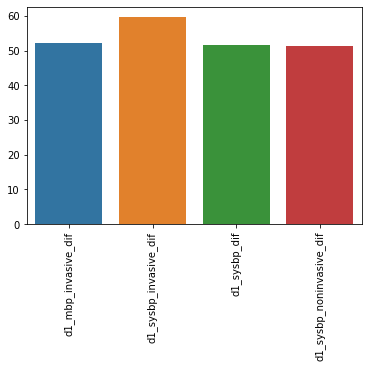

In [115]:
d = pd.DataFrame(vitalsdf.loc[:, vitalsdf.columns.str.startswith('d1')])
h = pd.DataFrame(vitalsdf.loc[:, vitalsdf.columns.str.startswith('h1')])

for f in vitalsvars:
    max_d1 = 'd1_' + f + '_max'
    min_d1 = 'd1_' + f + '_min'
    
    d['d1_' + f + '_dif'] = d[max_d1] - d[min_d1]
    
d_dif=d.iloc[:,30:]

for f in vitalsvars:
    max_h1 = 'h1_' + f + '_max'
    min_h1 = 'h1_' + f + '_min'
    
    h['h1_' + f + '_dif'] = h[max_h1] - h[min_h1]
    
h_dif=h.iloc[:,30:]

#a=d_dif.corr()
#sns.heatmap(a, cmap="Reds")

d["d_nancount"] = d.isna().sum(axis=1)
h["h_nancount"] = h.isna().sum(axis=1)

dh=d.join(h)

minmax = dh.loc[:, ~((dh.columns.str.contains('dif')) |(dh.columns.str.contains('count')))]
mmdescribe= minmax.describe()

dif=pd.DataFrame(dh.loc[:, dh.columns.str.endswith(('dif'))])
df2 = dif[dif.columns[dif.mean(axis=0) > 50]]
df2mean=df2.mean()

plt.xticks(rotation=90)

sns.barplot(x = df2mean.index , y = df2mean)

In [129]:
(vitalsdf.isnull().sum()/len(vitalsdf)*100).to_frame().sort_values(by=0,ascending=False)

0
h1_diasbp_invasive_max     80.540424
h1_diasbp_invasive_min     80.540424
h1_sysbp_invasive_min      80.523522
h1_sysbp_invasive_max      80.523522
h1_mbp_invasive_min        80.492021
h1_mbp_invasive_max        80.492021
d1_diasbp_invasive_min     73.041020
d1_diasbp_invasive_max     73.041020
d1_sysbp_invasive_max      73.017971
d1_sysbp_invasive_min      73.017971
d1_mbp_invasive_max        72.887359
d1_mbp_invasive_min        72.887359
h1_temp_max                22.820901
h1_temp_min                22.820901
h1_mbp_noninvasive_min     10.216124
h1_mbp_noninvasive_max     10.216124
h1_diasbp_noninvasive_max   8.711787
h1_diasbp_noninvasive_min   8.711787
h1_sysbp_noninvasive_max    8.704872
h1_sysbp_noninvasive_min    8.704872
h1_mbp_max                  5.017018
h1_mbp_min                  5.017018
h1_resprate_min             4.958627
h1_resprate_max             4.958627
h1_spo2_min                 4.795747
h1_spo2_max                 4.795747
h1_diasbp_max               4.246410
h1_diasbp_min               4.246410
h1_sysbp_min                4.240264
h1_sysbp_max                4.240264
d1_temp_max                 3.452753
d1_temp_min                 3.452753
h1_heartrate_min            3.130066
h1_heartrate_max            3.130066
d1_mbp_noninvasive_min      1.711779
d1_mbp_noninvasive_max      1.711779
d1_diasbp_noninvasive_max   1.256944
d1_diasbp_noninvasive_min   1.256944
d1_sysbp_noninvasive_max    1.246956
d1_sysbp_noninvasive_min    1.246956
d1_resprate_min             0.524751
d1_resprate_max             0.524751
d1_spo2_min                 0.408737
d1_spo2_max                 0.408737
d1_mbp_min                  0.251235
d1_mbp_max                  0.251235
d1_diasbp_min               0.212820
d1_diasbp_max               0.212820
d1_sysbp_max                0.208210
d1_sysbp_min                0.208210
d1_heartrate_min            0.201295
d1_heartrate_max            0.201295

In [180]:
labeled_data['gender_code'] = np.where(labeled_data['gender']=='F',0,1)

In [181]:
#correlation between vitals and some demographic variables

data=labeled_data[['gender_code','age_bin','bmi_class_encoder','d1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_invasive_max',
 'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_invasive_max',
 'h1_mbp_invasive_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_invasive_max',
 'h1_sysbp_invasive_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min']]

In [200]:
d1=data.corr().iloc[:3,:20]

<AxesSubplot:>

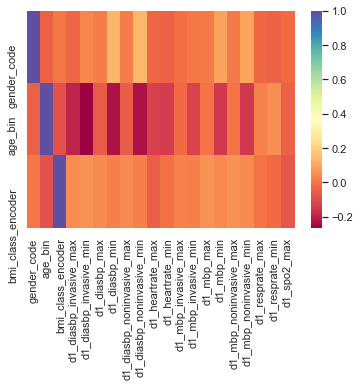

In [202]:
sns.heatmap(d1, cmap="Spectral")

In [204]:
#negative correlation between diabps and age : we can fill missing values with the ones registered for people in the same age group

#same for mbp : mean blood pressure

<AxesSubplot:>

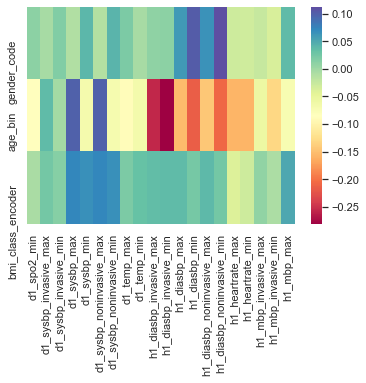

In [207]:
d2= data.corr().iloc[:3,20:40] #very low correlations
sns.heatmap(d2, cmap="Spectral")

In [208]:
#high correlation between sysbp values and BMI , as well as age bin : fill missing values with people with similar
#combinations of age and BMI

#again, relevant negative correlation between age and diasp : same as before , fillna

#negative correlation between heartrate and age bin: fill missing values for heartrate with the avg of people in
#the same group

<AxesSubplot:>

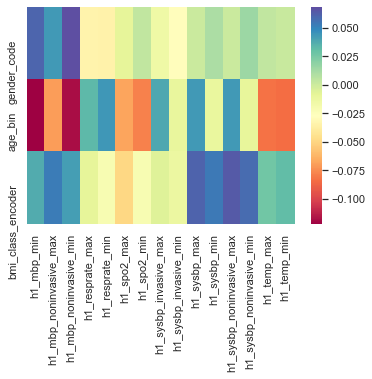

In [211]:
d3=data.corr().iloc[:3,40:]
sns.heatmap(d3, cmap="Spectral")
#repeated analysis 
#some correlation between resprate and age bin, but very low : do not consider relevant

## Relate blood pressure with the demographics and diabetes

Blood pressure is measured in units of millimeters of mercury (mmHg). The readings are always given in pairs, with the upper (systolic) value first, followed by the lower (diastolic) value.

https://www.ncbi.nlm.nih.gov/books/NBK279251/

- Normal blood pressure : systolic under 140 mmHg and diastolic under 90 mmHg
- High blood pressure:	systolic over 140 mmHg and/or diastolic over 90 mmHg
- Low blood pressure: systolyc under 90 and/or 60 mm Hg diastolic


In [130]:
#we will use d1_diasbp_min;d1_diasbp_max; d1_sysbp_max; d1_sysbp_min 
#because they are the evaluation of sysbp and diasp that have less missing values

In [131]:
labeled_data['sysbp_reference'] = (labeled_data['d1_sysbp_max']+labeled_data['d1_sysbp_min'])/2


In [132]:
labeled_data['diasbp_reference'] = (labeled_data['d1_diasbp_max']+labeled_data['d1_diasbp_min'])/2


In [141]:
def blood_pressure_level(sysbp, diasbp):
    if ((sysbp < 90) | (diasbp < 60)):
        return 'hipotension' 
    elif ((sysbp < 140) | (diasbp < 90)):
        return 'normal blood pressure' 
    elif ((sysbp > 140) & (diasbp > 90)):
        return 'hypertension'

def blood_pressure_level_encoder(sysbp, diasbp):
    if ((sysbp < 90) | (diasbp < 60)):
        return -1 
    elif ((sysbp < 140) | (diasbp < 90)):
        return 0 
    elif ((sysbp > 140) & (diasbp > 90)):
        return 1

In [142]:
labeled_data['blood_pressure_level'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level(x.sysbp_reference, x.diasbp_reference), axis=1)
labeled_data['blood_pressure_level_code'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level_encoder(x.sysbp_reference, x.diasbp_reference), axis=1)


/Users/marianapc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blood_pressure_leve', ylabel='count'>

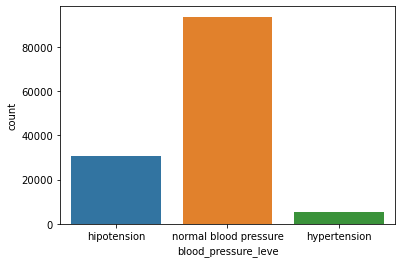

In [138]:
sns.countplot(labeled_data['blood_pressure_leve'])

<AxesSubplot:xlabel='blood_pressure_level'>

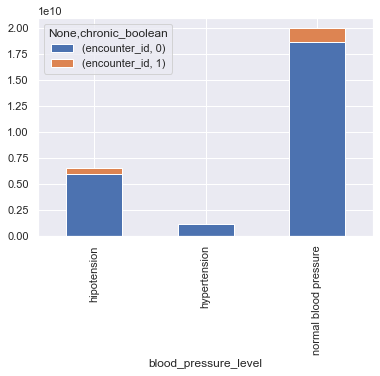

In [306]:
#relation between one of the comorbidity criterias and blood pressure
df1=labeled_data.groupby(['blood_pressure_level','chronic_boolean'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)

In [308]:
labeled_data[['chronic_boolean','blood_pressure_level_code']].corr()

chronic_boolean  blood_pressure_level_code
chronic_boolean                    1.00000                   -0.04092
blood_pressure_level_code         -0.04092                    1.00000

In [ ]:
labeled_data['blood_pressure_level'] = labeled_data[['sysbp_reference', 'diasbp_reference']].apply(lambda x: blood_pressure_level(x.sysbp_reference, x.diasbp_reference), axis=1)


In [144]:
#labeled_data.columns.to_list()

In [143]:
labeled_data[['age_bin','bmi_class_encoder','diabetes_mellitus','blood_pressure_level_code']].corr()

age_bin  bmi_class_encoder  diabetes_mellitus  \
age_bin                    1.000000          -0.086358           0.063762   
bmi_class_encoder         -0.086358           1.000000           0.152406   
diabetes_mellitus          0.063762           0.152406           1.000000   
blood_pressure_level_code -0.144595           0.038906          -0.030374   

                           blood_pressure_level_code  
age_bin                                    -0.144595  
bmi_class_encoder                           0.038906  
diabetes_mellitus                          -0.030374  
blood_pressure_level_code                   1.000000

<AxesSubplot:xlabel='blood_pressure_level'>

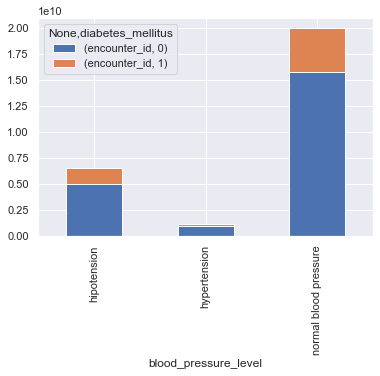

In [167]:
df1=labeled_data.groupby(['blood_pressure_level','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)

## Relate heart rate with the demographics and diabetes

In [215]:
hearratevars=[]
for i in vitalsdf.columns:
    if "heartrate" in i:
        hearratevars.append(i)

In [221]:
#almost no missing data
labeled_data[hearratevars].isnull().sum()/len(labeled_data)

d1_heartrate_max    0.002013
d1_heartrate_min    0.002013
h1_heartrate_max    0.031301
h1_heartrate_min    0.031301
dtype: float64

A normal resting heart rate for adults ranges from 60 to 100 beats per minute.Generally, a lower heart rate at rest implies more efficient heart function and better cardiovascular fitness. 

Normal heart rates at rest:

- Children (ages 6 - 15) 70 – 100 beats per minute; 
- Adults (age 18 and over) 60 – 100 beats per minute

https://my.clevelandclinic.org/health/diagnostics/17402-pulse--heart-rate

In [237]:
labeled_data['heartrate_reference'] = (labeled_data['d1_heartrate_max']+labeled_data['d1_heartrate_min']+labeled_data['h1_heartrate_min']+labeled_data['h1_heartrate_max'])/4


In [239]:
def heartrate_level (beats):
    if (beats<60):
        return 'low'
    elif (beats<100):
        return 'normal'
    elif (beats>100):
        return 'fast'
    


In [240]:
labeled_data['heartrate_level'] = labeled_data['hearrate_reference'].apply(heartrate_level)


In [241]:
labeled_data['heartrate_level']= np.where((labeled_data['age']<16) & (labeled_data['heartrate_reference']<70),'low',labeled_data['heartrate_level'])

In [242]:
def heartrate_level_code (level):
    if (level=='low'):
        return -1
    elif (level=='normal'):
        return 0
    elif (level=='fast'):
        return 1

In [243]:
labeled_data['heartrate_level_code'] = labeled_data['heartrate_level'].apply(heartrate_level_code)

<AxesSubplot:xlabel='heartrate_level'>

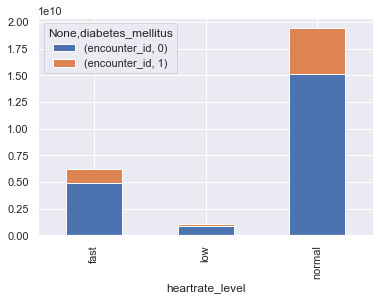

In [244]:
df1=labeled_data.groupby(['heartrate_level','diabetes_mellitus'])['encounter_id'].sum().to_frame().unstack()
df1.plot(kind='bar',stacked=True,legend=True)

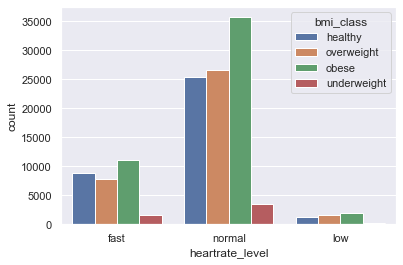

In [302]:
ax = sns.countplot(x="heartrate_level", hue="bmi_class", data=labeled_data)

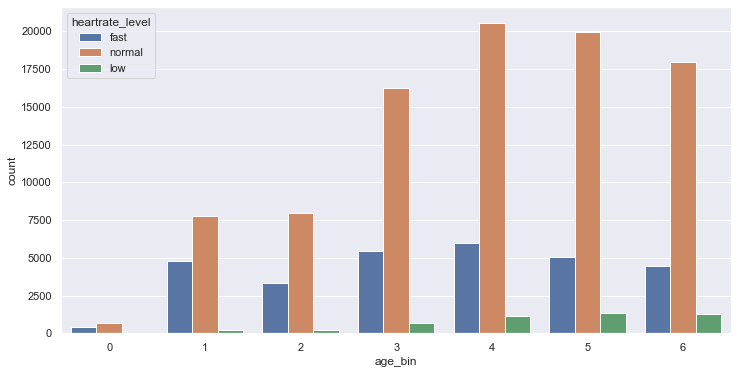

In [301]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="age_bin", hue="heartrate_level", data=labeled_data)

In [314]:
labeled_data[['chronic_boolean','heartrate_level_code']].corr()

chronic_boolean  heartrate_level_code
chronic_boolean              1.000000              0.061982
heartrate_level_code         0.061982              1.000000

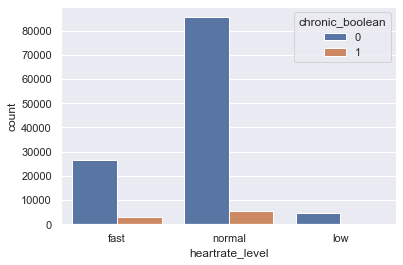

In [304]:
ax = sns.countplot(x="heartrate_level", hue="chronic_boolean", data=labeled_data)

In [322]:
labeled_data[['heartrate_level_code','chronic_boolean','blood_pressure_level_code']].corr().style.background_gradient(cmap='Blues')